# Benchmark RNA folder

Benchmarking my RNA folder compared to ViennaRNA. 

## Parameters
**Dataset**: bad_seq

**Seq. Length**: < 80 ntds

**minBPinStem**: 3

In [21]:
import numpy as np
import os, sys, glob
import matplotlib.pyplot as plt
sys.path.append('/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/')
import gillespie as GILLESPIE
import time
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'serif', 'serif':['Computer Modern Roman, Times']})

In [2]:
def str_append(s):
    output = ''
    output += s
    return output

def readFile(file):
    f = open(file, 'r')
    for i, line in enumerate(f):
        if i == 1:
            seq = line.rstrip()
        if i == 2:
            dots = line.split(' ')[1]
            dots.rstrip()
        if i == 3:
            rnafold = line.split(' ')[1]
            rnafold.rstrip()
    return seq, dots, rnafold

def compareStructs(pred, answer):
    count = 0
    for i in range(len(pred)):
        if pred[i] != answer[i]:
            count +=1
    return count

def switchRep(structure):
    structure.replace('[', '(')
    structure.replace(']', ')')
    return structure

def getData(length, files):
    sequences = []
    brackets = []
    viennaRNA = []
    for file in files:
        seq, dot, rnafold = readFile(file)
        if len(seq) <= length:
            sequences.append(seq)
            brackets.append(dot)
            viennaRNA.append(rnafold)
    return sequences, brackets, viennaRNA

In [9]:
seq_files = glob.glob('/Users/harrisonlabollita/Arizona State University/Sulc group/data_set/bad_seq/*')
sequences, dotbrackets, viennaRNA = getData(80, seq_files)
seqLength = [len(seq) for seq in sequences]
print('Length of dataset: %d' %(len(sequences)))
print('Mean Length: %d' %(np.mean(seqLength)))
print('Max Length: %d' %(np.max(seqLength)))
print('Min Length: %d' %(np.min(seqLength)))

Length of dataset: 117
Mean Length: 73
Max Length: 78
Min Length: 71


In [10]:
total_misses = []
rna_misses = []
for i in range(len(sequences)):
    seq = sequences[i]
    dot = dotbrackets[i]
    rnafold = viennaRNA[i]
    start = time.time()
    G = GILLESPIE.Gillespie(seq, [], maxTime = 5, toPrint = False, initTime = False)
    structure = switchRep(G.runGillespie())
    mistakes = compareStructs(structure, dot)
    rna_mistake = compareStructs(rnafold, dot)
    rna_mistake /= len(seq)
    mistakes /= len(seq)
    total_misses.append(mistakes)
    rna_misses.append(rna_mistake)
    stop = time.time()
    print('{}/{}, Length: {}, Time: {:0.4f}, myCorrect(%): {:0.2f} RNAfoldCorrect(%): {:0.2f}'.format(i+1, len(sequences), len(seq), abs(stop-start), 1-mistakes, 1-rna_mistake))

/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


1/117, Length: 73, Time: 0.0430, myCorrect(%): 0.53 RNAfoldCorrect(%): 0.52
2/117, Length: 73, Time: 0.0191, myCorrect(%): 0.47 RNAfoldCorrect(%): 0.74
3/117, Length: 78, Time: 0.1034, myCorrect(%): 0.41 RNAfoldCorrect(%): 0.64
4/117, Length: 76, Time: 0.0190, myCorrect(%): 0.47 RNAfoldCorrect(%): 0.70
5/117, Length: 72, Time: 0.0184, myCorrect(%): 0.50 RNAfoldCorrect(%): 0.51
6/117, Length: 77, Time: 0.0346, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.65
7/117, Length: 72, Time: 0.0209, myCorrect(%): 0.50 RNAfoldCorrect(%): 0.64
8/117, Length: 73, Time: 0.0327, myCorrect(%): 0.45 RNAfoldCorrect(%): 0.60
9/117, Length: 72, Time: 0.0192, myCorrect(%): 0.47 RNAfoldCorrect(%): 0.72
10/117, Length: 74, Time: 0.0339, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.51
11/117, Length: 72, Time: 0.0331, myCorrect(%): 0.50 RNAfoldCorrect(%): 0.56
12/117, Length: 74, Time: 0.0640, myCorrect(%): 0.59 RNAfoldCorrect(%): 0.61
13/117, Length: 78, Time: 0.0226, myCorrect(%): 0.46 RNAfoldCorrect(%): 0.67


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


14/117, Length: 74, Time: 0.3144, myCorrect(%): 0.50 RNAfoldCorrect(%): 0.69
15/117, Length: 76, Time: 0.0216, myCorrect(%): 0.45 RNAfoldCorrect(%): 0.67
16/117, Length: 72, Time: 0.9012, myCorrect(%): 0.50 RNAfoldCorrect(%): 0.61
17/117, Length: 76, Time: 0.0317, myCorrect(%): 0.49 RNAfoldCorrect(%): 0.70
18/117, Length: 74, Time: 0.0187, myCorrect(%): 0.43 RNAfoldCorrect(%): 0.74
19/117, Length: 76, Time: 0.0194, myCorrect(%): 0.45 RNAfoldCorrect(%): 0.67


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


20/117, Length: 73, Time: 0.4613, myCorrect(%): 0.45 RNAfoldCorrect(%): 0.56


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


21/117, Length: 72, Time: 1.0695, myCorrect(%): 0.50 RNAfoldCorrect(%): 0.75
22/117, Length: 74, Time: 0.0607, myCorrect(%): 0.46 RNAfoldCorrect(%): 0.62
23/117, Length: 72, Time: 0.0230, myCorrect(%): 0.50 RNAfoldCorrect(%): 0.51
24/117, Length: 75, Time: 0.0762, myCorrect(%): 0.49 RNAfoldCorrect(%): 0.65
25/117, Length: 76, Time: 0.0437, myCorrect(%): 0.45 RNAfoldCorrect(%): 0.72
26/117, Length: 72, Time: 0.0484, myCorrect(%): 0.44 RNAfoldCorrect(%): 0.56


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


27/117, Length: 71, Time: 0.5879, myCorrect(%): 0.38 RNAfoldCorrect(%): 0.56
28/117, Length: 72, Time: 0.0999, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.58
29/117, Length: 74, Time: 0.0631, myCorrect(%): 0.54 RNAfoldCorrect(%): 0.62
30/117, Length: 74, Time: 0.4603, myCorrect(%): 0.54 RNAfoldCorrect(%): 0.64
31/117, Length: 76, Time: 0.0333, myCorrect(%): 0.45 RNAfoldCorrect(%): 0.74
32/117, Length: 74, Time: 0.0311, myCorrect(%): 0.54 RNAfoldCorrect(%): 0.59
33/117, Length: 75, Time: 0.1193, myCorrect(%): 0.44 RNAfoldCorrect(%): 0.60
34/117, Length: 72, Time: 0.0190, myCorrect(%): 0.50 RNAfoldCorrect(%): 0.69
35/117, Length: 73, Time: 6.3100, myCorrect(%): 0.70 RNAfoldCorrect(%): 0.55
36/117, Length: 73, Time: 0.0226, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.48
37/117, Length: 76, Time: 0.0254, myCorrect(%): 0.55 RNAfoldCorrect(%): 0.71
38/117, Length: 73, Time: 0.1357, myCorrect(%): 0.52 RNAfoldCorrect(%): 0.55


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


39/117, Length: 76, Time: 217.9798, myCorrect(%): 0.50 RNAfoldCorrect(%): 0.51
40/117, Length: 74, Time: 0.0500, myCorrect(%): 0.49 RNAfoldCorrect(%): 0.62
41/117, Length: 74, Time: 0.0692, myCorrect(%): 0.59 RNAfoldCorrect(%): 0.47
42/117, Length: 73, Time: 0.0191, myCorrect(%): 0.48 RNAfoldCorrect(%): 0.55
43/117, Length: 72, Time: 0.0646, myCorrect(%): 0.53 RNAfoldCorrect(%): 0.57
44/117, Length: 73, Time: 0.0256, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.48
45/117, Length: 74, Time: 0.0187, myCorrect(%): 0.50 RNAfoldCorrect(%): 0.59
46/117, Length: 76, Time: 0.0977, myCorrect(%): 0.58 RNAfoldCorrect(%): 0.51
47/117, Length: 75, Time: 0.1732, myCorrect(%): 0.64 RNAfoldCorrect(%): 0.72
48/117, Length: 76, Time: 0.2245, myCorrect(%): 0.38 RNAfoldCorrect(%): 0.47
49/117, Length: 74, Time: 0.3481, myCorrect(%): 0.59 RNAfoldCorrect(%): 0.64
50/117, Length: 71, Time: 0.1579, myCorrect(%): 0.61 RNAfoldCorrect(%): 0.70
51/117, Length: 73, Time: 0.0424, myCorrect(%): 0.45 RNAfoldCorrect(%): 0.

/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


54/117, Length: 73, Time: 0.2054, myCorrect(%): 0.48 RNAfoldCorrect(%): 0.49
55/117, Length: 74, Time: 0.0352, myCorrect(%): 0.54 RNAfoldCorrect(%): 0.64


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


56/117, Length: 73, Time: 281.8295, myCorrect(%): 0.49 RNAfoldCorrect(%): 0.62
57/117, Length: 74, Time: 0.1305, myCorrect(%): 0.47 RNAfoldCorrect(%): 0.55
58/117, Length: 71, Time: 0.0204, myCorrect(%): 0.46 RNAfoldCorrect(%): 0.72
59/117, Length: 71, Time: 0.0958, myCorrect(%): 0.61 RNAfoldCorrect(%): 0.72
60/117, Length: 76, Time: 0.0222, myCorrect(%): 0.45 RNAfoldCorrect(%): 0.59
61/117, Length: 71, Time: 0.1621, myCorrect(%): 0.44 RNAfoldCorrect(%): 0.70
62/117, Length: 73, Time: 0.2100, myCorrect(%): 0.59 RNAfoldCorrect(%): 0.49


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


63/117, Length: 73, Time: 5.7562, myCorrect(%): 0.40 RNAfoldCorrect(%): 0.73


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


64/117, Length: 77, Time: 7.2700, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.51
65/117, Length: 75, Time: 0.0449, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.63
66/117, Length: 73, Time: 0.0435, myCorrect(%): 0.62 RNAfoldCorrect(%): 0.74
67/117, Length: 71, Time: 0.1685, myCorrect(%): 0.55 RNAfoldCorrect(%): 0.65
68/117, Length: 72, Time: 0.0171, myCorrect(%): 0.39 RNAfoldCorrect(%): 0.75


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


69/117, Length: 74, Time: 0.3572, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.69


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


70/117, Length: 77, Time: 0.3071, myCorrect(%): 0.66 RNAfoldCorrect(%): 0.74
71/117, Length: 76, Time: 0.0308, myCorrect(%): 0.50 RNAfoldCorrect(%): 0.67
72/117, Length: 73, Time: 0.0518, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.53


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


73/117, Length: 71, Time: 0.3558, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.66


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


74/117, Length: 74, Time: 2.3584, myCorrect(%): 0.54 RNAfoldCorrect(%): 0.59
75/117, Length: 77, Time: 0.2596, myCorrect(%): 0.64 RNAfoldCorrect(%): 0.62
76/117, Length: 74, Time: 0.0185, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.65
77/117, Length: 71, Time: 0.3335, myCorrect(%): 0.61 RNAfoldCorrect(%): 0.66
78/117, Length: 71, Time: 0.0170, myCorrect(%): 0.38 RNAfoldCorrect(%): 0.69
79/117, Length: 73, Time: 0.1058, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.66
80/117, Length: 73, Time: 0.0423, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.60
81/117, Length: 75, Time: 0.0642, myCorrect(%): 0.57 RNAfoldCorrect(%): 0.65


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


82/117, Length: 74, Time: 8.2987, myCorrect(%): 0.59 RNAfoldCorrect(%): 0.69
83/117, Length: 72, Time: 0.0164, myCorrect(%): 0.42 RNAfoldCorrect(%): 0.62
84/117, Length: 78, Time: 0.0250, myCorrect(%): 0.54 RNAfoldCorrect(%): 0.67


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


85/117, Length: 73, Time: 228.0654, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.62
86/117, Length: 72, Time: 0.0830, myCorrect(%): 0.58 RNAfoldCorrect(%): 0.65
87/117, Length: 76, Time: 0.0238, myCorrect(%): 0.53 RNAfoldCorrect(%): 0.70
88/117, Length: 73, Time: 0.0594, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.53
89/117, Length: 75, Time: 0.0424, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.63
90/117, Length: 72, Time: 0.0379, myCorrect(%): 0.53 RNAfoldCorrect(%): 0.72
91/117, Length: 73, Time: 0.0286, myCorrect(%): 0.45 RNAfoldCorrect(%): 0.60
92/117, Length: 77, Time: 0.2100, myCorrect(%): 0.71 RNAfoldCorrect(%): 0.68


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


93/117, Length: 74, Time: 2.3358, myCorrect(%): 0.47 RNAfoldCorrect(%): 0.59
94/117, Length: 76, Time: 0.0263, myCorrect(%): 0.55 RNAfoldCorrect(%): 0.71
95/117, Length: 74, Time: 0.0169, myCorrect(%): 0.43 RNAfoldCorrect(%): 0.62
96/117, Length: 74, Time: 0.1940, myCorrect(%): 0.43 RNAfoldCorrect(%): 0.58


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


97/117, Length: 75, Time: 8.1601, myCorrect(%): 0.49 RNAfoldCorrect(%): 0.68


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


98/117, Length: 77, Time: 168.3881, myCorrect(%): 0.60 RNAfoldCorrect(%): 0.58
99/117, Length: 74, Time: 0.2057, myCorrect(%): 0.53 RNAfoldCorrect(%): 0.58
100/117, Length: 74, Time: 0.0416, myCorrect(%): 0.49 RNAfoldCorrect(%): 0.62


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


101/117, Length: 76, Time: 1.2757, myCorrect(%): 0.45 RNAfoldCorrect(%): 0.57
102/117, Length: 73, Time: 0.0394, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.49
103/117, Length: 77, Time: 0.2276, myCorrect(%): 0.53 RNAfoldCorrect(%): 0.58
104/117, Length: 72, Time: 0.0360, myCorrect(%): 0.42 RNAfoldCorrect(%): 0.72
105/117, Length: 74, Time: 0.0353, myCorrect(%): 0.51 RNAfoldCorrect(%): 0.50
106/117, Length: 76, Time: 0.0210, myCorrect(%): 0.53 RNAfoldCorrect(%): 0.63


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


107/117, Length: 73, Time: 0.1792, myCorrect(%): 0.45 RNAfoldCorrect(%): 0.74
108/117, Length: 72, Time: 0.0226, myCorrect(%): 0.50 RNAfoldCorrect(%): 0.74


/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:207: RuntimeWarning: overflow encountered in exp
  updateRates.append([np.exp(deltaS/kB), 1, trialIndex[i]])
/Users/harrisonlabollita/Arizona State University/Sulc group/src/kinetic_RNA/helperfunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  rates[i][0] = rates[i][0]/normalization


109/117, Length: 74, Time: 28.9077, myCorrect(%): 0.62 RNAfoldCorrect(%): 0.61
110/117, Length: 74, Time: 0.3751, myCorrect(%): 0.65 RNAfoldCorrect(%): 0.73
111/117, Length: 77, Time: 0.0445, myCorrect(%): 0.58 RNAfoldCorrect(%): 0.61
112/117, Length: 76, Time: 0.0859, myCorrect(%): 0.58 RNAfoldCorrect(%): 0.51
113/117, Length: 74, Time: 0.0353, myCorrect(%): 0.54 RNAfoldCorrect(%): 0.50
114/117, Length: 74, Time: 0.5095, myCorrect(%): 0.59 RNAfoldCorrect(%): 0.61
115/117, Length: 76, Time: 0.0299, myCorrect(%): 0.45 RNAfoldCorrect(%): 0.63
116/117, Length: 77, Time: 0.0206, myCorrect(%): 0.45 RNAfoldCorrect(%): 0.56
117/117, Length: 73, Time: 0.0182, myCorrect(%): 0.47 RNAfoldCorrect(%): 0.74


In [16]:
print('myMean:', 1- np.mean(total_misses))
print('myMax:', 1-np.min(total_misses))
print('myMin:', 1-np.max(total_misses))
print('rnaMean:', 1-np.mean(rna_misses))
print('rnaMax:', 1-np.min(rna_misses))
print('rnaMin:', 1-np.max(rna_misses))

myMean: 0.5095064872360898
myMax: 0.7142857142857143
myMin: 0.3802816901408451
rnaMean: 0.6253826357970707
rnaMax: 0.75
rnaMin: 0.472972972972973


# Results
|**Stats** | **myFolder** | **ViennaRNA** |
|:--------:|:------------:|:-------------:|
| Mean     |    0.51      |        0.63   |  
| Best     |      0.71    |     0.75      |
| Worst    |      0.38    |      0.47     |

# myFolder Results

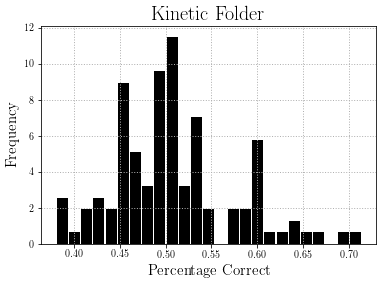

In [37]:
myCorrect = [1 - total_misses[i] for i in range(len(total_misses))]
plt.figure()
plt.title('Kinetic Folder', fontsize = 20)
plt.xlabel('Percentage Correct', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.grid(True, linestyle = ':', linewidth = 1)
plt.hist(myCorrect, bins = 25, density = True, histtype = 'bar', rwidth = 0.9, color = 'black',linewidth = 2)
plt.savefig('myfolder.eps', format = 'eps')

# ViennaRNA Results

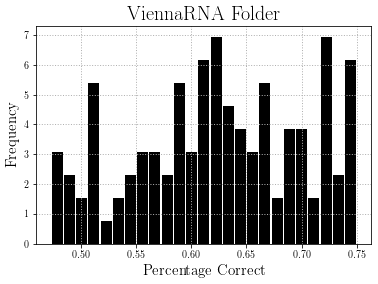

In [36]:
rnaCorrect = [1 - rna_misses[i] for i in range(len(rna_misses))]
plt.figure()
plt.title('ViennaRNA Folder', fontsize = 20)
plt.xlabel('Percentage Correct', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.grid(True, linestyle = ':', linewidth = 1)
plt.hist(rnaCorrect, bins = 25, density = True, histtype = 'bar', rwidth = 0.9, color = 'black',linewidth = 2)
plt.savefig('viennarna.eps', format = 'eps')